In [1]:
import pandas as pd
import numpy as np

# Creating Synthetic Data

In [2]:
# columns i want

# screen_time_hours
# sleep_duration_hours
# study_time_hours
# workout_time_hours
# stress_level -> extrenal stress
# anxiety_level ->  internal
# coffee_intake_mg
# socializing_time_hours
# water_intake_litres
# junk_food_intake

In [3]:
sample_size = 500
np.random.seed(42)

In [4]:
screen_time_hours = np.random.normal(6, 2, sample_size).clip(0, 16) # mean = 6 sd =2 values lie between 0 and 16
sleep_duration_hours = np.random.normal(7, 1.5, sample_size).clip(3, 12)
study_time_hours = np.random.normal(4, 2, sample_size).clip(0, 12)
workout_time_hours = np.random.normal(1, 0.5, sample_size).clip(0, 3)
stress_level = np.random.randint(1, 6, sample_size)  # 1-5 external stress
anxiety_level = np.random.randint(1, 6, sample_size)  # 1-5 internal anxiety
coffee_intake_mg = np.random.normal(150, 80, sample_size).clip(0, 500)
socializing_time_hours = np.random.normal(2, 1, sample_size).clip(0, 8)
water_intake_litres = np.random.normal(2, 0.5, sample_size).clip(0.5, 5)
junk_food_intake = np.random.randint(1, 6, sample_size)  # 1-5

In [5]:
# Burnout increases with stress, anxiety, screen time, junk food, coffee
# Burnout decreases with sleep, workout, socializing, water
burnout_score = (
    0.25*screen_time_hours +
    -0.3*sleep_duration_hours +
    0.2*study_time_hours +
    -0.3*workout_time_hours +
    5*stress_level +
    4*anxiety_level +
    0.01*coffee_intake_mg +
    -0.5*socializing_time_hours +
    -1*water_intake_litres +
    2*junk_food_intake
)

In [6]:
burnout_score = ((burnout_score - burnout_score.min()) / (burnout_score.max() - burnout_score.min()) * 10).round(2)

# first min-max scale value lie between 0 and 1 then multiple by 10 so value lies between 0 and 10 then roundoff to 2 decimal places

In [7]:
data = pd.DataFrame({
    "screen_time_hours": screen_time_hours,
    "sleep_duration_hours": sleep_duration_hours,
    "study_time_hours": study_time_hours,
    "workout_time_hours": workout_time_hours,
    "stress_level": stress_level,
    "anxiety_level": anxiety_level,
    "coffee_intake_mg": coffee_intake_mg,
    "socializing_time_hours": socializing_time_hours,
    "water_intake_litres": water_intake_litres,
    "junk_food_intake": junk_food_intake,
    "burnout_score": burnout_score
})

In [8]:
data.to_csv("../data/synthetic_burnout_data.csv", index=False)

In [9]:
data

,screen_time_hours,sleep_duration_hours,study_time_hours,workout_time_hours,stress_level,anxiety_level,coffee_intake_mg,socializing_time_hours,water_intake_litres,junk_food_intake,burnout_score
0,6.993428,8.389266,6.798711,1.389181,3,2,203.491989,2.942846,1.799196,3,4.60
1,5.723471,9.864125,5.849267,0.724407,3,1,76.559299,3.110349,1.922731,2,2.83
2,7.295377,4.902149,4.119261,0.590901,3,1,276.243001,3.083273,2.963104,3,3.81
3,9.046060,7.844454,2.706126,0.998313,4,3,61.908777,1.433593,1.476089,1,5.59
4,5.531693,6.024036,5.396447,0.914908,5,2,58.067609,1.420800,1.592748,5,7.55
...,...,...,...,...,...,...,...,...,...,...,...
495,7.077820,6.578350,8.012186,1.535075,1,2,0.000000,1.260283,1.553573,4,2.84
496,3.925508,9.696530,8.123007,0.986739,3,2,164.944351,2.865953,1.375056,5,5.31
497,5.619323,7.961264,6.416732,0.559063,2,5,65.592759,1.717424,2.281932,2,5.39
498,4.248763,6.143232,6.048125,0.918467,2,5,261.241806,1.828282,2.334936,5,7.09


In [10]:
# lets remove the meaning less data generated here which is total hours should be less than equal to 24

total_hours = data["screen_time_hours"] + data["sleep_duration_hours"] + data["study_time_hours"] + data["workout_time_hours"]

data = data[total_hours <= 24].reset_index(drop = True) # resets the index for dropped rows
data

,screen_time_hours,sleep_duration_hours,study_time_hours,workout_time_hours,stress_level,anxiety_level,coffee_intake_mg,socializing_time_hours,water_intake_litres,junk_food_intake,burnout_score
0,6.993428,8.389266,6.798711,1.389181,3,2,203.491989,2.942846,1.799196,3,4.60
1,5.723471,9.864125,5.849267,0.724407,3,1,76.559299,3.110349,1.922731,2,2.83
2,7.295377,4.902149,4.119261,0.590901,3,1,276.243001,3.083273,2.963104,3,3.81
3,9.046060,7.844454,2.706126,0.998313,4,3,61.908777,1.433593,1.476089,1,5.59
4,5.531693,6.024036,5.396447,0.914908,5,2,58.067609,1.420800,1.592748,5,7.55
...,...,...,...,...,...,...,...,...,...,...,...
476,7.077820,6.578350,8.012186,1.535075,1,2,0.000000,1.260283,1.553573,4,2.84
477,3.925508,9.696530,8.123007,0.986739,3,2,164.944351,2.865953,1.375056,5,5.31
478,5.619323,7.961264,6.416732,0.559063,2,5,65.592759,1.717424,2.281932,2,5.39
479,4.248763,6.143232,6.048125,0.918467,2,5,261.241806,1.828282,2.334936,5,7.09


# EDA

In [19]:
data.head()

,screen_time_hours,sleep_duration_hours,study_time_hours,workout_time_hours,stress_level,anxiety_level,coffee_intake_mg,socializing_time_hours,water_intake_litres,junk_food_intake,burnout_score
0,6.993428,8.389266,6.798711,1.389181,3,2,203.491989,2.942846,1.799196,3,4.60
1,5.723471,9.864125,5.849267,0.724407,3,1,76.559299,3.110349,1.922731,2,2.83
2,7.295377,4.902149,4.119261,0.590901,3,1,276.243001,3.083273,2.963104,3,3.81
3,9.046060,7.844454,2.706126,0.998313,4,3,61.908777,1.433593,1.476089,1,5.59
4,5.531693,6.024036,5.396447,0.914908,5,2,58.067609,1.420800,1.592748,5,7.55


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   screen_time_hours       481 non-null    float64
 1   sleep_duration_hours    481 non-null    float64
 2   study_time_hours        481 non-null    float64
 3   workout_time_hours      481 non-null    float64
 4   stress_level            481 non-null    int32  
 5   anxiety_level           481 non-null    int32  
 6   coffee_intake_mg        481 non-null    float64
 7   socializing_time_hours  481 non-null    float64
 8   water_intake_litres     481 non-null    float64
 9   junk_food_intake        481 non-null    int32  
 10  burnout_score           481 non-null    float64
dtypes: float64(8), int32(3)
memory usage: 35.8 KB


In [21]:
data.describe()

,screen_time_hours,sleep_duration_hours,study_time_hours,workout_time_hours,stress_level,anxiety_level,coffee_intake_mg,socializing_time_hours,water_intake_litres,junk_food_intake,burnout_score
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,5.921085,6.979878,4.121146,1.010313,3.039501,2.875260,148.822001,1.952226,2.021494,3.018711,5.283617
std,1.907202,1.434987,1.926430,0.477144,1.427592,1.430702,75.856793,0.962485,0.493064,1.385063,2.074407
min,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.682016,1.000000,0.000000
25%,4.563112,6.062772,2.773195,0.688675,2.000000,2.000000,94.841774,1.297252,1.691161,2.000000,3.690000
50%,5.961968,6.994596,4.119261,0.988566,3.000000,3.000000,152.810134,1.916606,2.020729,3.000000,5.370000
75%,7.190314,7.932715,5.346363,1.336287,4.000000,4.000000,200.393189,2.662117,2.346060,4.000000,6.790000
max,12.157762,10.948573,9.159419,2.596554,5.000000,5.000000,352.365160,4.750723,3.828851,5.000000,10.000000


In [ ]:
# no missing values as it is synthetic


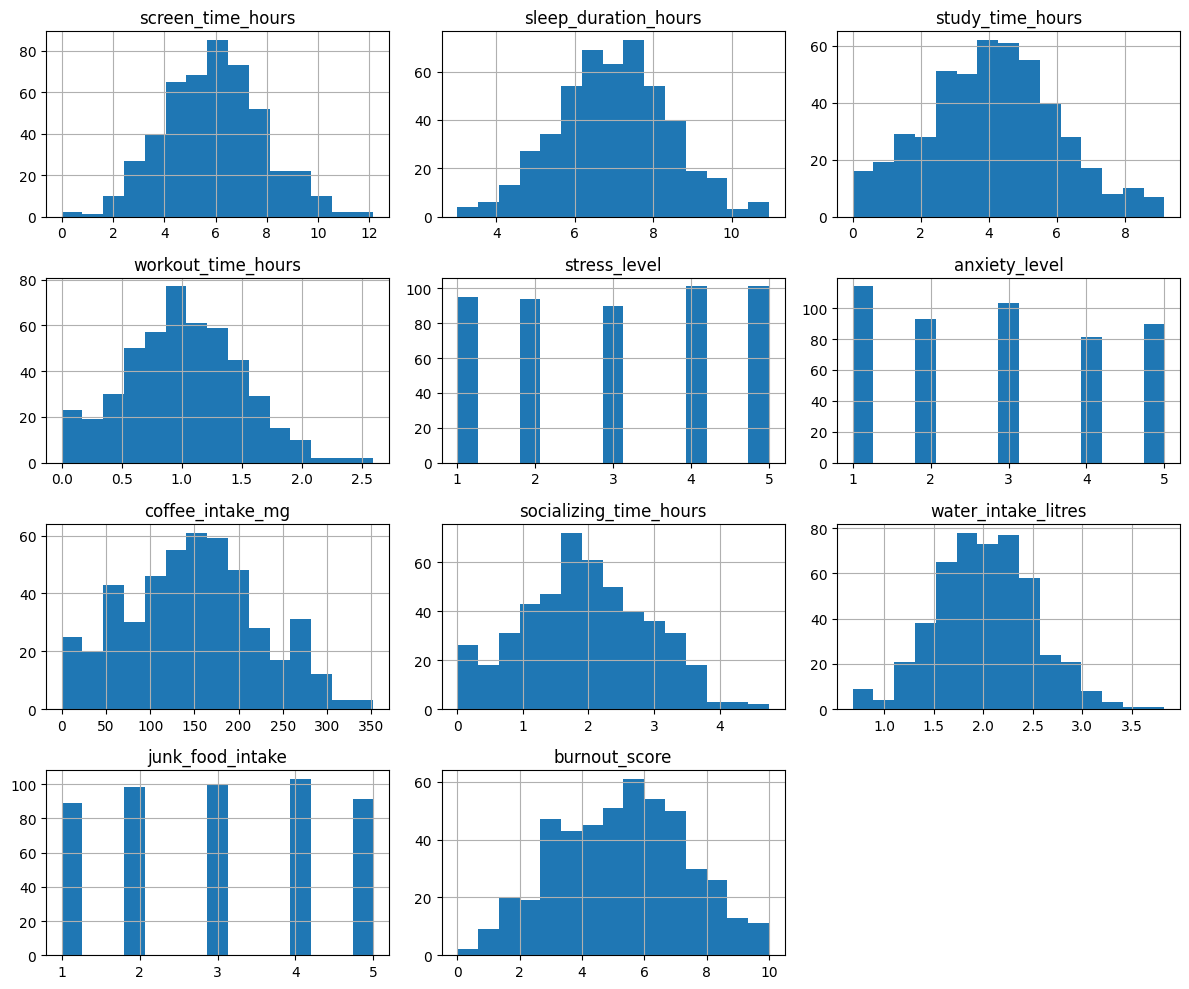

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for all features
data.hist(figsize=(12,10), bins=15)
plt.tight_layout()
plt.show()


In [ ]:
# socializing is little bit right skewed rest are normally distributed

burnout_score             1.000000
stress_level              0.724347
anxiety_level             0.599841
junk_food_intake          0.292125
coffee_intake_mg          0.152131
screen_time_hours         0.089273
study_time_hours          0.062498
workout_time_hours        0.056641
sleep_duration_hours     -0.028974
socializing_time_hours   -0.033958
water_intake_litres      -0.069250
Name: burnout_score, dtype: float64


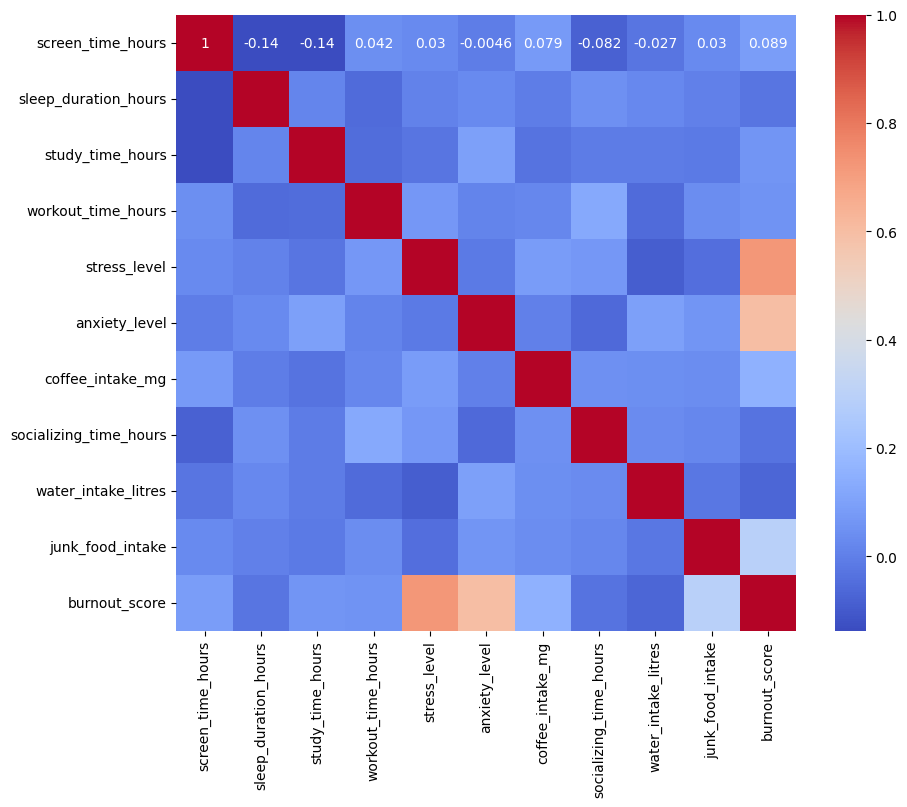

In [23]:
corr_matrix = data.corr()
print(corr_matrix["burnout_score"].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


In [ ]:
# stress and anxiety are linked to burnout more as compare to others

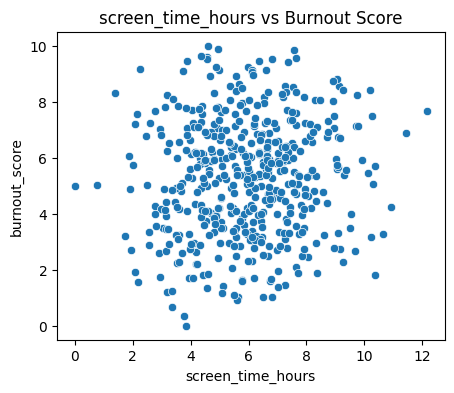

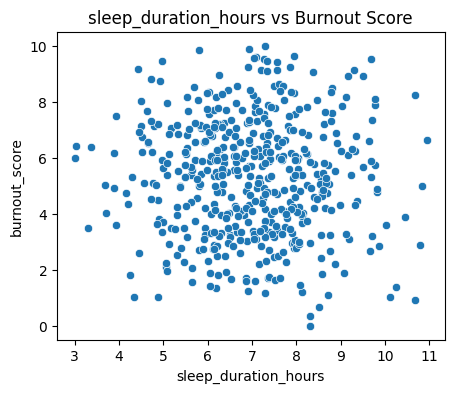

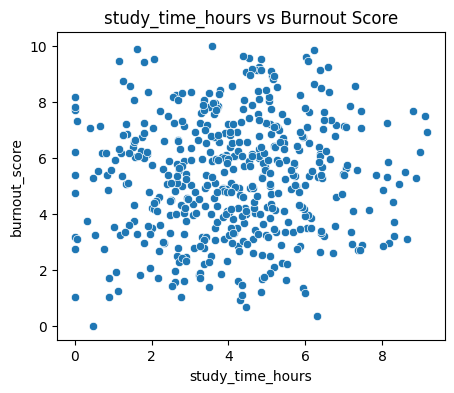

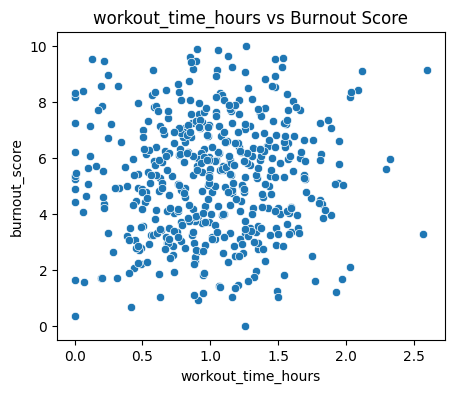

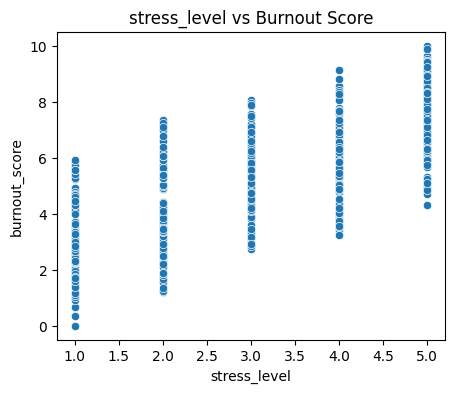

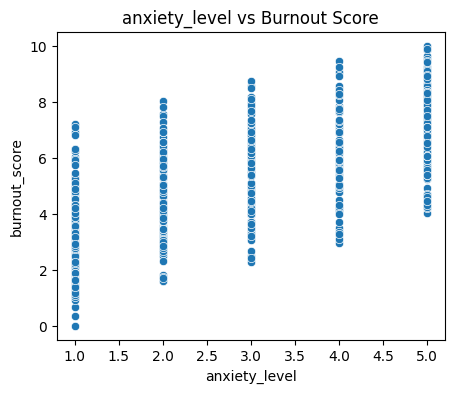

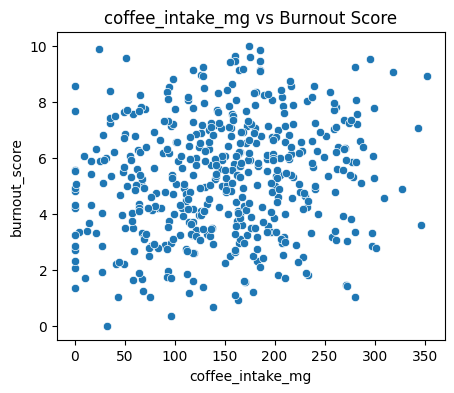

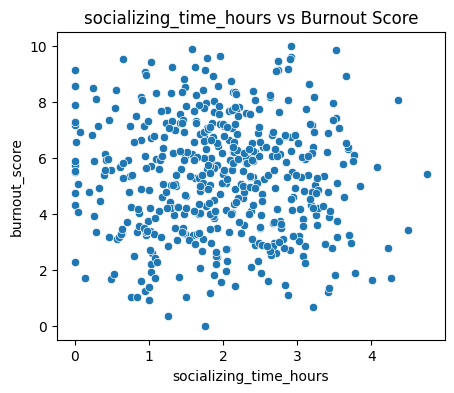

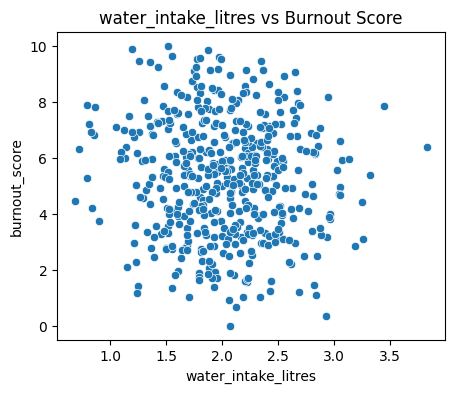

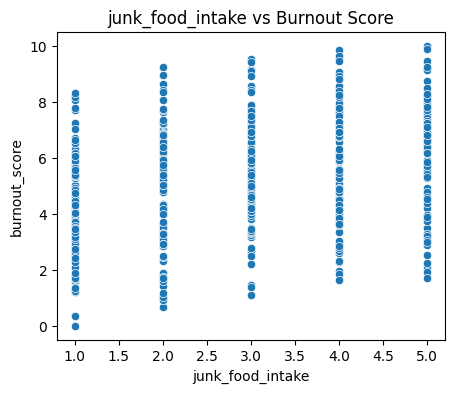

In [24]:
features = data.columns[:-1]  # exclude burnout_score

for feature in features:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=data[feature], y=data["burnout_score"])
    plt.title(f"{feature} vs Burnout Score")
    plt.show()
